In [1]:
import pandas as pd
from matplotlib.patches import Polygon

spreadsheet_path='/Users/evogytis/Google Drive/CMS_manuscript/Figure1_SpecimenDemographics/Figure1draft_190606/Figure1_DemographicStats.xlsx'
spreadsheet=pd.read_excel(spreadsheet_path)

subtable=spreadsheet.values[8:,:4]
print(subtable)

genera_values={}

for i,row in enumerate(subtable):
    if i==0:
        genera=row[1:]
    else:
        genera_values[row[0]]={genus:row[j+1] for j,genus in enumerate(genera)}

print(genera_values)

import numpy as np
from io import StringIO
import requests,json

California_counties_url='https://raw.githubusercontent.com/codeforamerica/click_that_hood/master/public/data/california-counties.geojson'
response=requests.get(California_counties_url)

json_map=json.load(StringIO(response.text)) ## import json

features=json_map['features']
location_points={} ## location points will be stored here
polygons={} ## polygons will be stored here

locName='name' ## key name for each feature

for loc in features: ## iterate through features (locations)
    poly = np.asarray(loc['geometry']['coordinates']) ## get coordinates
#     location=removeDiacritics(loc['properties'][locName]) ## standardised location name (remove diacritics)
    location=loc['properties'][locName]
    polygons[location]=[]
    location_points[location]=[]
    if loc['geometry']['type']=='MultiPolygon': ## multiple parts detected
        for part in np.asarray(poly): ## iterate over each component polygon
            for coords in np.asarray(part): ## iterate over coordinates
                coords=np.array(coords)
                xs=coords[:,0] ## longitudes
                ys=coords[:,1] ## latitudes

                location_points[location].append(np.vstack(zip(xs,ys))) ## append coordinates to location's list of coordinates
    if loc['geometry']['type']=='Polygon': ## location is single part
        for coords in np.asarray(poly): ## iterate over coordinates
            coords=np.array(coords)
            xs=coords[:,0] ## longitudes
            ys=coords[:,1] ## latitudes
            location_points[location].append(np.vstack(zip(xs,ys))) ## append coordinates to location's list of coordinates

    complete_location=[]
    for part in location_points[location]: ## iterate over each component of a location
        complete_location.append(Polygon(part,True)) ## create a polygon for each component of a location

    polygons[location]=complete_location ## assign list of polygons to a location

    
sample_colour={'ALCO':(0.49803923567136127, 0.43267975250879925, 0.52287583549817396), ## purple
               'WVAL':(0.88366013765335083, 0.77908497055371606, 0.18562091886997223), ## yellow
               'COAV':(0.8162552973803352, 0.41062668737243202, 0.29078047883276847), ## red
               'PLACER':(0.28098424626331703, 0.63955403192370541, 0.39507882933990629), ## green
               'PLCR':(0.28098424626331703, 0.63955403192370541, 0.39507882933990629), ## green
               'SAND':(0.4666666666666667, 0.7450980392156863, 0.8588235294117647), ## light blue
               'NA':  '#C0C0C0'}

sample_coordinate_path='/Users/evogytis/Documents/manuscripts/skeeters/data/TableS1_CMS.csv'
loc_points={}
for line in open(sample_coordinate_path,'r'):
    l=line.strip('\n').split(',')
    if 'Specimen' not in l[0] and l.count('')<3 and len(l)>0:
        loc_points[l[5].strip(' ')]=(float(l[8]),float(l[7]))
        
loc_points['PLACER']=loc_points['PLCR']
print(loc_points)

[[nan 'Aedes' 'Culex' 'Culiseta']
 ['ALCO' 1 50 9]
 ['PLACER' 0 7 0]
 ['COAV' 0 12 0]
 ['WVAL' 23 24 0]
 ['SAND' 9 7 6]]
{'ALCO': {'Aedes': 1, 'Culex': 50, 'Culiseta': 9}, 'PLACER': {'Aedes': 0, 'Culex': 7, 'Culiseta': 0}, 'COAV': {'Aedes': 0, 'Culex': 12, 'Culiseta': 0}, 'WVAL': {'Aedes': 23, 'Culex': 24, 'Culiseta': 0}, 'SAND': {'Aedes': 9, 'Culex': 7, 'Culiseta': 6}}
{'ALCO': (-122.07938, 37.55697), 'SAND': (-117.0575668, 32.5928337), 'WVAL': (-117.63305600000001, 33.93778), 'COAV': (-115.95663200000001, 33.525475), 'PLCR': (-121.372895, 38.787211), 'PLACER': (-121.372895, 38.787211)}


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:48: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:54: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.


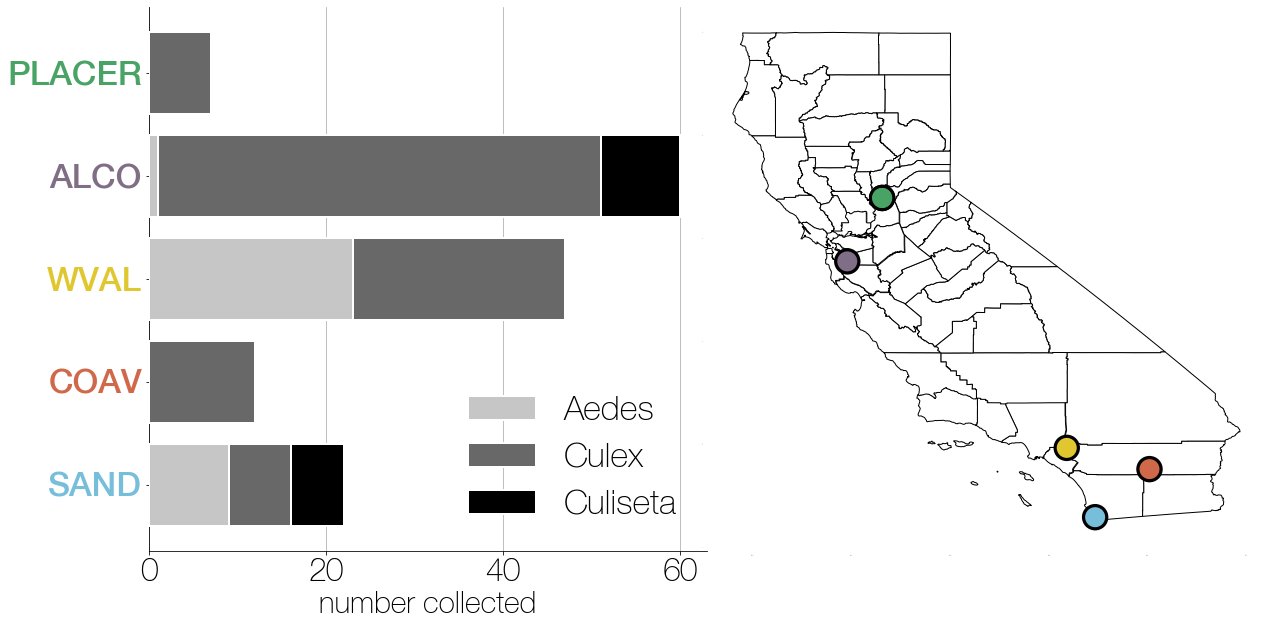

In [2]:
%matplotlib inline
import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib import gridspec

typeface='Helvetica Neue'
mpl.rcParams['font.weight']=400
mpl.rcParams['axes.labelweight']=400
mpl.rcParams['font.family']=typeface
mpl.rcParams['font.size']=22

from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection

fig = plt.figure(figsize=(20, 10),facecolor='w') 
gs = gridspec.GridSpec(1,2,wspace=0.0) 

ax=plt.subplot(gs[0],facecolor='w')
subax=plt.subplot(gs[1],facecolor='w')

genera_colours={sorted(genera)[x]: mpl.cm.Greys((x+1)/float(len(genera))) for x in range(len(genera))}
loc_labels=sorted(genera_values,key=lambda k: loc_points[k][1])

for i,loc in enumerate(loc_labels):
    gens=sorted(genera_values[loc])
    for j in range(len(gens)):
        value=genera_values[loc][gens[j]]
        bottom=sum([genera_values[loc][genus] for genus in gens[:j]])
        
        labels=ax.get_legend_handles_labels()[1]
        label=gens[j] if gens[j] not in labels else ''
        ax.barh(i,value,left=bottom,facecolor=genera_colours[gens[j]],edgecolor='w',lw=2,label=label,zorder=100)

ax.set_yticks(range(len(loc_labels)))
ax.set_yticklabels(loc_labels,size=34,weight=500)

for loc in ax.get_yticklabels():
#     print(loc.get_text())
    loc.set_color(sample_colour[loc.get_text()])

ax.legend(loc=4,fontsize=34,frameon=False)
# ax.set_xlim(0,80)
[ax.spines[side].set_visible(False) for side in ax.spines if side not in ['bottom','left']]
ax.grid(axis='x')
ax.set_xlabel('number collected',size=30)
ax.tick_params(axis='x',labelsize=32)

# subax = fig.add_axes([0.55,0.12,0.5,0.5],facecolor='none',zorder=0)
# subax.set_aspect(1)
subax.tick_params(size=0,labelsize=0)
[subax.spines[side].set_visible(False) for side in subax.spines]

for loc in sample_colour:
#     print(loc,loc in loc_points,loc in sample_colour)
    if loc!='NA':
        subax.scatter(*loc_points[loc],s=400,facecolor=sample_colour[loc],edgecolor='none',zorder=10)
        subax.scatter(*loc_points[loc],s=700,facecolor='k',edgecolor='none',zorder=9)

for loc in polygons:
    county=PatchCollection(polygons[loc],facecolor='w',edgecolor='k',zorder=0)
    subax.add_collection(county)
subax.plot()

plt.savefig('/Users/evogytis/Documents/manuscripts/skeeters/figures/demo_summary.png',bbox_inches='tight',dpi=300)
plt.savefig('/Users/evogytis/Documents/manuscripts/skeeters/figures/demo_summary.pdf',bbox_inches='tight',dpi=300)    
plt.show()
